# 毕业论文`GRAD`
## 建立多元线性回归模型，定量评估影响

*`Evan`*\
*`2023-11-16`*
---

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import sys
sys.path.append('../../src/')
from namelist import *

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

# 读取数据：将三年数据拼接

In [2]:
lowyears  = [2014,2015,2016]
highyears = [2019,2021,2022]
datapath  = datadir + 'Contribution/data/'

df = {}
for year in lowyears:
    df[year] = pd.read_excel(datapath + f'SIM_PRD_Sep_{year}.xlsx',index_col=0)
dflow = pd.concat(df,axis=0)
df = {}
for year in highyears:
    df[year] = pd.read_excel(datapath + f'SIM_PRD_Sep_{year}.xlsx',index_col=0)
dfhigh = pd.concat(df,axis=0)

dflow.reset_index(level=0,inplace=True)
dflow.drop(columns='level_0',inplace=True)
dfhigh.reset_index(level=0,inplace=True)
dfhigh.drop(columns='level_0',inplace=True)

In [3]:
# 创建一个dataframe存储各变量的作用
df = pd.DataFrame (index=dflow.columns,
                   columns=['LowYear_Importance','HighYear_Importance'])

## 低值年

In [4]:
xlist = ['SFC_TMP', 'SOL_RAD', 'RH', 'PRES', 
         'WSPD10', 'WDIR10','CloudFRAC',
         'NO2', 'VOC', 'PM25', 'ISOP'] # 'PBLH',
#! 这里去掉PBLH是因为该要素影响最大，不合理

X = dflow[xlist]
y = dflow['O3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建随机森林回归模型
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 训练模型
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [5]:
# 预测结果
y_pred_rf = rf_model.predict(X_test)

# 均方误差
mse = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error (Random Forest): {mse}')

# 决定系数
r2 = r2_score(y_test, y_pred_rf)
print(f'R-squared (Random Forest): {r2}')


Mean Squared Error (Random Forest): 248.9373862988073
R-squared (Random Forest): 0.9017299546822182


In [6]:
# 获取特征的重要性
feature_importance = rf_model.feature_importances_

# 将特征重要性与特征名对应起来
feature_importance_dict = dict(zip(xlist, feature_importance))

# 按照重要性降序排列
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# 输出每个变量对O3的影响大小
# for feature, importance in sorted_feature_importance:
#     print(f'{feature}: {importance}')
    
for feature, importance in sorted_feature_importance:
    df.loc[feature,'LowYear_Importance'] = importance
df

,LowYear_Importance,HighYear_Importance
SFC_TMP,0.331585,NaN
SOL_RAD,0.22789,NaN
RH,0.068188,NaN
PRES,0.020131,NaN
WSPD10,0.052247,NaN
WDIR10,0.035213,NaN
PBLH,NaN,NaN
CloudFRAC,0.029442,NaN
O3,NaN,NaN
NO2,0.063394,NaN


## 高值年

In [7]:
xlist = ['SFC_TMP', 'SOL_RAD', 'RH', 'PRES', 
         'WSPD10', 'WDIR10','CloudFRAC',
         'NO2', 'VOC', 'PM25', 'ISOP'] # 'PBLH',

X = dfhigh[xlist]
y = dfhigh['O3']

X_train, X_test, y_train, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建随机森林回归模型
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 训练模型
rf_model.fit(X_train, y_train)

# 预测结果
y_pred_rf2 = rf_model.predict(X_test)

# 均方误差
mse = mean_squared_error(y_test2, y_pred_rf2)
print(f'Mean Squared Error (Random Forest): {mse}')

# 决定系数
r2 = r2_score(y_test2, y_pred_rf2)
print(f'R-squared (Random Forest): {r2}')

# 获取特征的重要性
feature_importance = rf_model.feature_importances_

# 将特征重要性与特征名对应起来
feature_importance_dict = dict(zip(xlist, feature_importance))

# 按照重要性降序排列
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# 输出每个变量对O3的影响大小
# for feature, importance in sorted_feature_importance:
#     print(f'{feature}: {importance}')

for feature, importance in sorted_feature_importance:
    df.loc[feature,'HighYear_Importance'] = importance
df

Mean Squared Error (Random Forest): 207.31794566851136
R-squared (Random Forest): 0.9013102325046476


,LowYear_Importance,HighYear_Importance
SFC_TMP,0.331585,0.186239
SOL_RAD,0.22789,0.397256
RH,0.068188,0.054293
PRES,0.020131,0.022555
WSPD10,0.052247,0.045356
WDIR10,0.035213,0.040251
PBLH,NaN,NaN
CloudFRAC,0.029442,0.024042
O3,NaN,NaN
NO2,0.063394,0.025204


In [9]:
# randomforest_concatinate_PRDaveraged
filepath = 'D:/data/Graduation/Contribution/RandomForest_output/'
filename = 'RF_PRD.xlsx'
df.to_excel(filepath + filename,index=True)

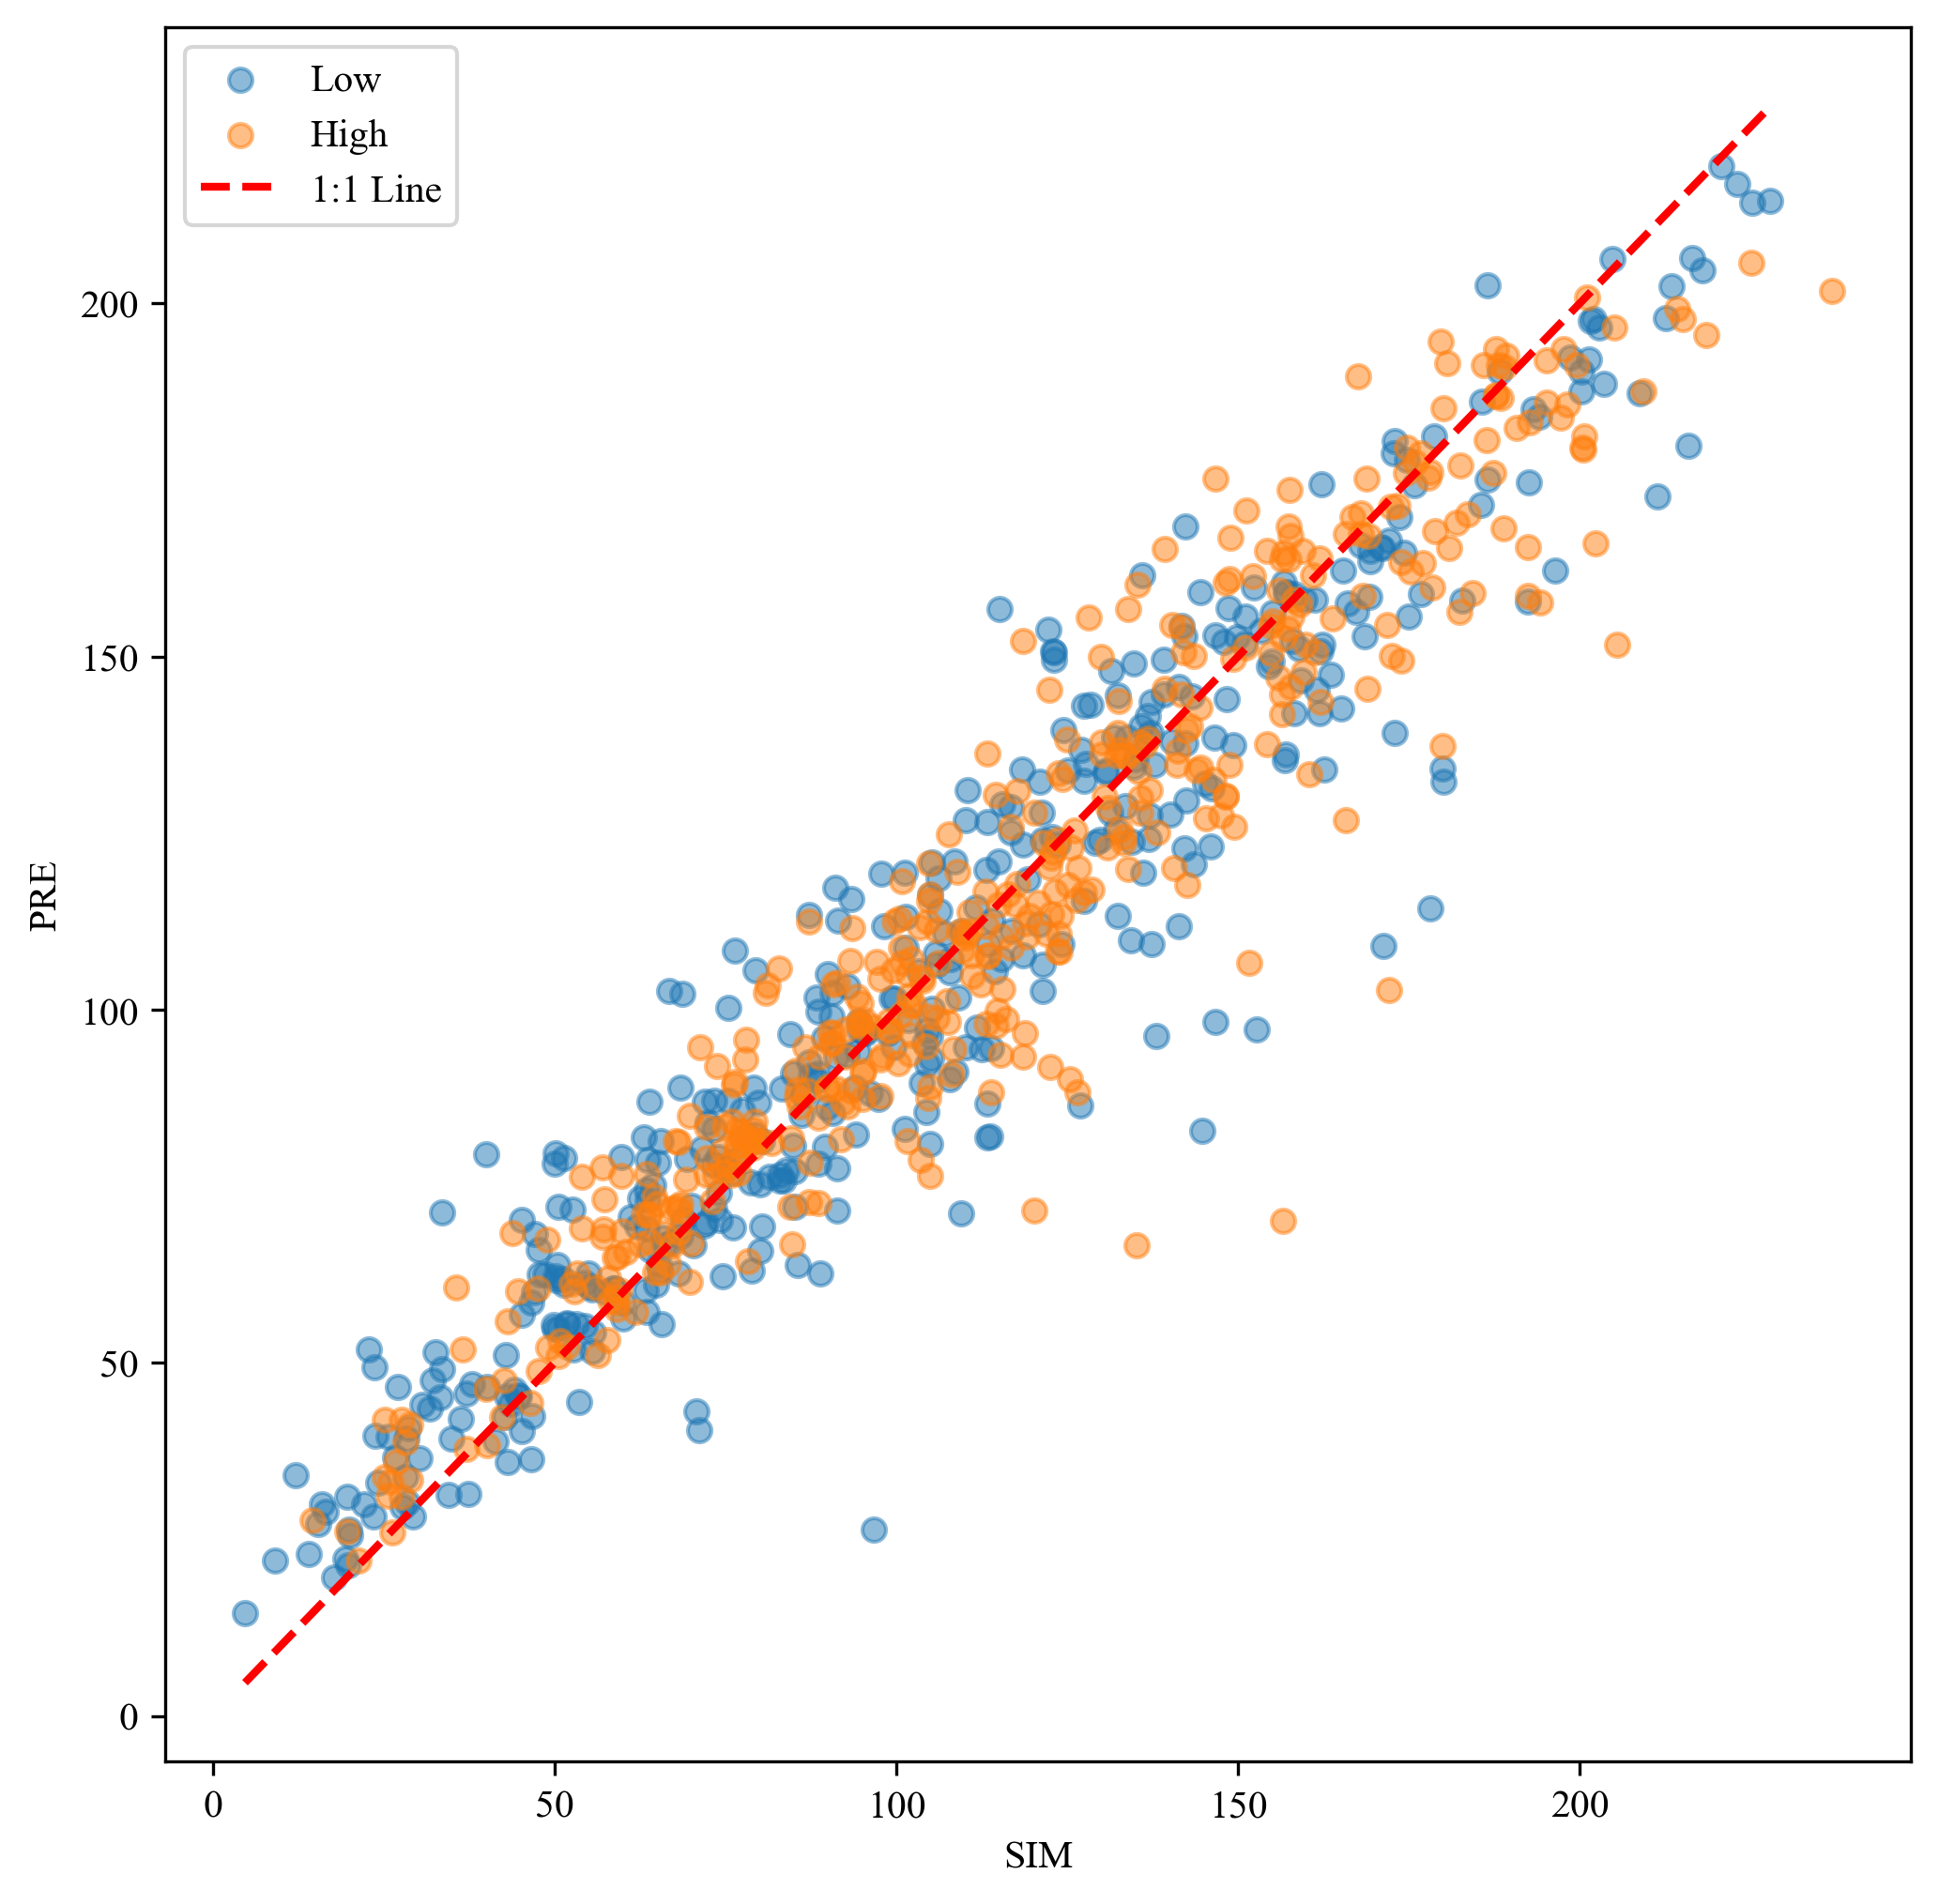

In [8]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

fig = plt.figure(figsize=(8, 8),dpi=300)
ax = fig.add_subplot(111)
ax.scatter(y_test, y_pred_rf, alpha=0.5,label='Low')
ax.scatter(y_test2, y_pred_rf2, alpha=0.5,color='tab:orange',label='High')
ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2, label='1:1 Line')
ax.set_xlabel('SIM')
ax.set_ylabel('PRE')
ax.legend()
plt.show()
